Removing edge discount -- engagement based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'discount', 'node_j': 'engagement', 'cond_set': []}
Removing edge discount -- new_items based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'discount', 'node_j': 'new_items', 'cond_set': []}
Removing edge discount -- stale_items based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'discount', 'node_j': 'stale_items', 'cond_set': []}
Removing edge service_problems -- engagement based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'service_problems', 'node_j': 'engagement', 'cond_set': []}
Removing edge service_problems -- new_items based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'service_problems', 'node_j': 'new_items', 'cond_set': []}
Removing edge service_problems -- stale_items based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'service_problems', 'node_j': 'stale_items', 'cond_set': []}
Remo

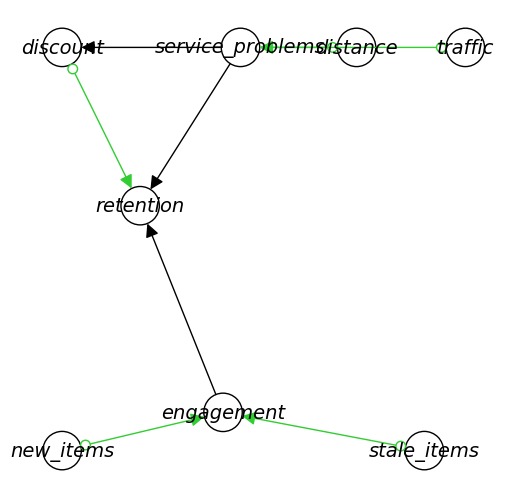

In [23]:
import pandas
import numpy

n = 10000
traffic = numpy.random.normal(size=(n,))
distance = numpy.random.normal(size=(n,))

service_problems = numpy.random.normal(size=(n,)) + traffic + 2 * distance
discount = numpy.random.normal(size=(n,)) + service_problems

new_items = numpy.random.normal(size=(n,))
stale_items = numpy.random.normal(size=(n,))

engagement = numpy.random.normal(size=(n,)) + new_items - stale_items
retention = (
    numpy.random.normal(size=(n,)) + discount - 2 * service_problems + engagement
)

data = pandas.DataFrame(
    {
        "traffic": traffic,
        "distance": distance,
        "service_problems": service_problems,
        "discount": discount,
        "new_items": new_items,
        "stale_items": stale_items,
        "engagement": engagement,
        "retention": retention,
    }
)
from causal_discovery_algs.icd import LearnStructICD
from causal_discovery_algs.fci import LearnStructFCI
from causal_discovery_utils.cond_indep_tests import CondIndepParCorr

par_corr_test = CondIndepParCorr(dataset=data, threshold=0.01)
icd = LearnStructFCI(set(data.columns), par_corr_test)  # instantiate an ICD learner
icd.learn_structure()  # learn the causal graph
from plot_utils.draw_graph import draw_graph

from server.utils import graph_object_to_edges

edges = [(x["source"], x["target"]) for x in graph_object_to_edges(icd.graph._graph)]

import networkx as nx

cg = {
    "edges": edges,
}

causal_graph = nx.DiGraph([tuple(x) for x in cg["edges"]])

_ = draw_graph(icd.graph)

In [2]:
data = pandas.read_csv("~andre/Downloads/bank.csv")

In [3]:
edges = [
    ("job", "poutcome"),
    ("marital", "poutcome"),
    ("balance", "poutcome"),
    ("age", "poutcome"),
    ("deposit", "poutcome"),
    ("balance", "poutcome"),
]

causal_graph = nx.DiGraph(edges)

In [36]:
import numpy as np


def edges_to_adjacency_matrix(edges, mapping):
    n = len(mapping)
    adj_mat = np.zeros((n, n), dtype=int)

    reverse_mapping = {v: k for k, v in enumerate(mapping)}
    relationship_map = {"partially_known": 1, "arrow": 2, "directed": 3}

    inverse_relationship_map = {v: k for k, v in relationship_map.items()}

    for edge in edges:
        source = reverse_mapping[edge["source"]]
        target = reverse_mapping[edge["target"]]
        edge_type = edge["data"]["edge_type"]
        relationship = edge["data"]["relationship"]

        if edge_type == "undirected":
            adj_mat[target, source] = relationship
            adj_mat[source, target] = relationship

        if edge_type == "partially_known":
            adj_mat[target, source] = 1
            adj_mat[source, target] = 2

        if edge_type == "directed":
            adj_mat[target, source] = 3
            adj_mat[source, target] = 2

    return adj_mat

In [37]:
from server.utils import graph_object_to_edges

original_mat = icd.graph.get_adj_mat()
graph = icd.graph._graph
node_index_map = {node: i for i, node in enumerate(sorted(list(graph.keys())))}
index_node_map = {i: node for node, i in node_index_map.items()}
edges = graph_object_to_edges(icd.graph._graph)

In [42]:
index_node_map

{0: 'discount',
 1: 'distance',
 2: 'engagement',
 3: 'new_items',
 4: 'retention',
 5: 'service_problems',
 6: 'stale_items',
 7: 'traffic'}

In [40]:
original_mat

array([[0, 0, 0, 0, 2, 3, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 1, 2, 0, 1, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [1, 0, 3, 0, 0, 3, 0, 0],
       [2, 1, 0, 0, 2, 0, 0, 1],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0]])

In [38]:
edges_to_adjacency_matrix(edges, node_index_map)

ValueError: invalid literal for int() with base 10: 'partially_known'

In [32]:
original_mat

array([[0, 0, 0, 0, 2, 3, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 1, 2, 0, 1, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [1, 0, 3, 0, 0, 3, 0, 0],
       [2, 1, 0, 0, 2, 0, 0, 1],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0]])

In [19]:
from effekx.DataManager import SCM

In [20]:
scm = SCM(data=data, graph=causal_graph)

In [21]:
scm.data

,traffic,distance,service_problems,discount,new_items,stale_items,engagement,retention
0,1.283028,-0.775581,-0.128862,1.175453,-1.139289,-0.502720,0.612859,1.263408
1,0.900116,1.871263,4.125190,3.034507,-0.310516,0.219752,-1.369524,-6.414975
2,-0.883967,-0.363948,-3.230330,-4.011358,-0.076284,-0.187863,-0.358400,1.999035
3,0.295507,0.858427,3.182411,4.569550,1.504759,0.369287,1.854187,-1.860810
4,-1.247047,0.595033,-0.207016,0.040169,-1.032558,1.480542,-2.538671,-3.819639
...,...,...,...,...,...,...,...,...
9995,0.595438,2.192194,5.111354,5.020899,0.438732,-0.718145,0.667228,-5.002752
9996,-0.579709,-1.013770,-2.640104,-3.131441,-0.847869,0.864075,-1.640454,0.439815
9997,1.250172,-1.621381,-1.274336,-1.399194,0.106706,0.500320,-2.185439,-0.469367
9998,1.202082,-3.030226,-4.888710,-4.261517,1.822334,1.343763,-0.718116,3.147964


In [22]:
scm.fit_all()

Model for discount fitted.None
Model for retention fitted.None
Model for service_problems fitted.None
Model for engagement fitted.None


[[0 1 0 0]
 [1 0 3 0]
 [0 0 0 2]
 [0 0 0 0]]


In [15]:
scm.get_total_strength("discount", "retention")

0.8031279052145925

In [53]:
from effekx.DataManager import quantile_abs

quantile_abs(numpy.array([[1, 2, 3], [4, 5, 6]]).reshape(-1), 99)

In [1]:
numpy.array([[1, 2, 3], [4, 5, 6]]).reshape(-1)

NameError: name 'numpy' is not defined

In [43]:
scm.explanations

{'discount': [{'feature': 'service_problems',
   'target': 'discount',
   'target_magnitude': 2.624528267665054,
   'type': 'number-number',
   'explanation': {'magnitude': 2.431255509085836,
    'strength': array([0.92428748]),
    'details': [{'index': 'discount',
      'service_problems': 0.9242874761858908}]}}],
 'retention': [{'feature': 'discount',
   'target': 'retention',
   'target_magnitude': 3.288618040487892,
   'type': 'number-number',
   'explanation': {'magnitude': 2.624528267665054,
    'strength': array([0.80055153]),
    'details': [{'index': 'retention', 'discount': 0.8005515300015492}]}},
  {'feature': 'engagement',
   'target': 'retention',
   'target_magnitude': 3.288618040487892,
   'type': 'number-number',
   'explanation': {'magnitude': 1.7264824805310368,
    'strength': array([0.52552374]),
    'details': [{'index': 'retention', 'engagement': 0.5255237360765178}]}},
  {'feature': 'service_problems',
   'target': 'retention',
   'target_magnitude': 3.288618040

In [38]:
numpy.percentile([1, 2], 90)

1.9

In [14]:
target = "retention"
target = "poutcome"

r = scm.fit(target)
explanations = scm.explain(target)

In [34]:
scm.get_total_strength("")

True

In [15]:
model = r["model"]
normalization = r["normalization"]
feature_groups = r["feature_groups"]
features = r["features"]

In [17]:
d = explanations[2]

d["target_magnitude"] * d["explanation"]["strength"] / d["explanation"]["magnitude"]

KeyError: 'target_magnitude'

In [105]:
pandas.DataFrame([model.coef_], columns=features)

,discount,engagement,service_problems
0,0.800552,0.525524,-1.477446


In [103]:
features

['discount', 'engagement', 'service_problems']

In [83]:
def marginal_contribution(x):
    return numpy.exp(x) / (1 + numpy.exp(x)) - 1 / 2


coefs = model.coef_
class_names = model.classes_
features = model.feature_names_in_

coefs_df = (
    pandas.DataFrame(coefs, columns=features, index=class_names).apply(
        lambda x: marginal_contribution(x)
    )
    * 100
)
t = []
for feature_group in feature_groups:
    this_df = coefs_df.loc[:, feature_groups[feature_group]]
    strength = numpy.quantile(this_df.apply(lambda x: numpy.abs(x)).values, 0.9)

    t.append(
        {"feature_group": feature_group, "strength": strength, "features": this_df}
    )
normalization

AttributeError: 'LinearRegression' object has no attribute 'classes_'

In [76]:
def maximize_abs(df):
    result = pandas.DataFrame(index=df.columns, columns=["maximizer", "initial value"])

    for col in df.columns:
        # Find the index of the maximum absolute value in the column
        max_index = df[col].abs().idxmax()
        # Get the actual value at this index
        max_value = df.loc[max_index, col]

        # Assign the results to the new DataFrame
        result.loc[col, "maximizer"] = max_index
        result.loc[col, "initial value"] = max_value

    return result


ldf = t[2]["features"]
maximize_abs(ldf)

,maximizer,initial value
balance,other,1.472745


In [77]:
ldf

,balance
failure,-0.581432
other,1.472745
success,0.108482
unknown,-1.000061


In [49]:
numpy.quantile(t[0].apply(lambda x: numpy.abs(x)).values, 0.9)

5.424747662548428

In [31]:
df["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [32]:
coefs_df

,job_admin.,job_blue-collar,job_management,job_services,job_technician,marital_married,marital_single,balance,age,deposit
failure,6.356593,3.217470,1.877094,4.486749,4.344574,3.533030,1.498997,-0.581432,-0.381939,-12.833567
other,0.721431,4.942745,1.994225,-1.674888,-0.845701,-3.233713,0.622532,1.472745,-1.564640,-7.126821
success,-2.963734,-12.354906,-1.025313,-5.321209,-4.073633,4.754350,5.436193,0.108482,3.008501,34.870649
unknown,-4.135971,4.423534,-2.844727,2.515974,0.572882,-5.052152,-7.522241,-1.000061,-1.064880,-21.348714


In [18]:
df["poutcome"].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [103]:
[f(z) for z in model.coef_]

[array([-0.00407987,  0.0043021 ,  0.03937012, -0.00406405,  0.05752939,
         0.09111359,  0.05586111, -0.01426256, -0.00788628, -0.17892322,
         0.47087323]),
 array([-0.03435843,  0.04765132,  0.05124276, -0.03842606,  0.02022104,
         0.01279184,  0.04037466,  0.00715732, -0.01931131, -0.11999588,
         0.46663813]),
 array([-0.0473284 , -0.07832639,  0.02076793, -0.03422865,  0.0028298 ,
         0.04796439,  0.07758516, -0.01064638,  0.02814024,  0.3100467 ,
         0.4488927 ]),
 array([ 0.08512605,  0.02685226, -0.10983529,  0.07624893, -0.08014991,
        -0.14844219, -0.16798824,  0.01774915, -0.00096215, -0.05279129,
        -0.49994424])]

In [99]:
def f(x):
    return numpy.exp(x) / (1 + numpy.exp(x)) - 1 / 2

In [11]:
r["model"].classes_

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [83]:
model.feature_names_in_.shape

(11,)

In [84]:
df.groupby("poutcome")["pdays"].mean()

poutcome
failure    237.730456
other      216.484171
success    161.347339
unknown     -0.965410
Name: pdays, dtype: float64

In [74]:
model.classes_

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [45]:
t = []
for node in causal_graph.nodes:
    if len(list(causal_graph.predecessors(node))) > 0:
        t.append(scm.prepare_modelling_data(node=node))

In [46]:
t[0][0]

,job_admin.,job_blue-collar,job_management,job_services,job_technician,marital_married,marital_single,balance,age,deposit,pdays
0,True,False,False,False,False,True,False,2343,59,1,-1
1,True,False,False,False,False,True,False,45,56,1,-1
2,False,False,False,False,True,True,False,1270,41,1,-1
3,False,False,False,True,False,True,False,2476,55,1,-1
4,True,False,False,False,False,True,False,184,54,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
11157,False,True,False,False,False,False,True,1,33,0,-1
11158,False,False,False,True,False,True,False,733,39,0,-1
11159,False,False,False,False,True,False,True,29,32,0,-1
11160,False,False,False,False,True,True,False,0,43,0,172


In [28]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
